In [1]:
ticker = "MANCHIN-24NOV06"

In [1]:
from pathlib import Path
import os
def load_env_vars_from_file(path: Path):
    file = path.read_text()
    for line in file.splitlines():
        if line.startswith("export"):
            var_to_value = line.split(" ")[1].split("=")
            var_ = var_to_value[0]
            value_ = var_to_value[1][1:-1]
            os.environ[var_] = value_
def set_up_prod_credentials():
    file = "../../../../scripts/prod_setup_creds.sh"
    load_env_vars_from_file(Path(file))
set_up_prod_credentials()

In [22]:
from exchange.interface import ExchangeInterface
from datetime import datetime


start = datetime(2024, 5, 30)
end = datetime(2024, 6, 2)
e = ExchangeInterface(is_test_run=False)
mh = e.get_market_history(ticker, start, end)

In [23]:
no_ask = [x.no_ask for x in mh]
yes_ask = [x.yes_ask for x in mh]
ts = [x.ts for x in mh]

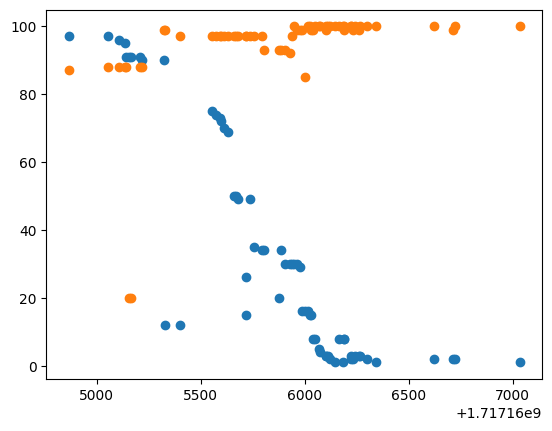

In [24]:
import matplotlib.pyplot as plt

skip_first = 2
skip_last = 50
plt.scatter(ts[skip_first:-1*skip_last], no_ask[skip_first:-1*skip_last])
plt.scatter(ts[skip_first:-1*skip_last], yes_ask[skip_first:-1*skip_last])

In [26]:
start = datetime(2024, 5, 30)
end = datetime(2024, 6, 2)
e = ExchangeInterface(is_test_run=False)
trades = list(e.get_trades(ticker, start, end))

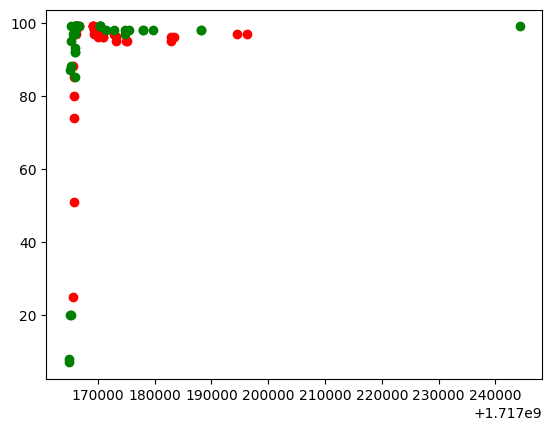

In [45]:
from helpers.types.orders import Side


yes_price_no_taker = [x.yes_price for x in trades if x.taker_side == Side.NO]
ts_no_taker = [x.created_time.timestamp() for x in trades if x.taker_side == Side.NO]

yes_price_yes_taker = [x.yes_price for x in trades if x.taker_side == Side.YES]
ts_yes_taker = [x.created_time.timestamp() for x in trades if x.taker_side == Side.YES]

skip_first = 1
skip_last = 1

plt.scatter(ts_no_taker[skip_first:-1*skip_last], yes_price_no_taker[skip_first:-1*skip_last], c='red')
plt.scatter(ts_yes_taker[skip_first:-1*skip_last], yes_price_yes_taker[skip_first:-1*skip_last], c='green')

In [8]:
def check_price_movement(df, P, S):
    return (len(df) > S) and ((max(df.yes_ask_price) - min(df.yes_ask_price) > P) or (max(df.yes_bid_price) - min (df.yes_bid_price) > P))

In [4]:
from strategy.utils import ColeDBInterface
from exchange.interface import ExchangeInterface
all_tickers = []

db = ColeDBInterface()
e = ExchangeInterface(is_test_run=False)

total_markets_roughly = 70000
for series_ticker in db.get_series_tickers():
    try:
        freq = e.get_series(series_ticker).frequency
    except:
        print('error for', series_ticker)
        continue
    # Only want non-daily markets for analysis
    if freq == "daily":
        continue
    for event_ticker in db.get_event_tickers(series_ticker):
        for market_ticker in db.get_market_tickers(event_ticker):
            all_tickers.append(market_ticker)
            

error for OSCAR
error for RENTNYC
error for NYCRENTS
error for GPT%
error for NEWOUTBREAK
error for COVVOHC
error for NASDAQ100D
error for INXD
error for 1SONG
error for NASDAQ100DU
error for INXDU


In [5]:
from pathlib import Path
p = Path("non-daily-tickers.txt")
# p.write_text(str(all_tickers))

103896

In [10]:
import multiprocess as mp

import more_itertools

chunks = list(more_itertools.chunked(all_tickers, len(all_tickers) // 7))
def check_this(tickers):
    assert len(tickers) == len(set(tickers))
    for ticker in tickers:
        if ticker.startswith("INX") or ticker.startswith("NASDAQ"):
            continue
        try:
            df = db.read_bbo_df(ticker).dropna()
            if check_price_movement(df, 30, 500):
                print(ticker)
        except:
            continue
    
num_processes = 8

# Create a pool of worker processes
with mp.Pool(processes=num_processes) as pool:
    # Map the function to a range of values in parallel
    results = pool.map(check_this, chunks)


U3-23SEP-T3.5CPIYOY-23NOV-T3.1
TOPALBUMRECORDY-TTPD-11

CPIYOY-23NOV-T3.0TOPALBUMRECORDY-TTPD-7TNOTEW-23OCT20-B4.55

FRMMAX-23DEC28-P7.6TROPSTORM-23DEC01-T21


TOPALBUMRECORDY-TTPD-6U3-24APR-T3.8

FRMMAX-23DEC28-P7.8
TOPALBUMRECORDY-TTPD-10
CPIYOY-24MAR-T3.2
CPIYOY-24MAR-T3.3
TOPALBUMRECORDY-TTPD-4CPIYOY-24MAR-T3.4

TOPALBUMRECORDY-TTPD-12
FRMMAX-23DEC28-P8.0
SAG-23OCT31
SAG-23DEC1
NETNEU-24-MAY31
HOMEUS-23-T2
TNOTEW-23OCT20-T4.83
HOMEUS-23-T0
CPIYOY-23OCT-T3.2
RTKINDS-60
TOPALBUMBYBILLIE-24
U3-24APR-T3.9
CPIYOY-23OCT-T3.3
WEALTHY-24-MZRTKINDS-80

RTKINDS-75
U3-24APR-T4.0
TIKTOKSELL-24-DEC31
RTKINDS-90
TNOTEW-24MAY24-B4.51
U3-24APR-T3.5
RTKINDS-85
WEALTHY-24-EM
CPIYOY-24MAY-T3.4
TNOTEW-24MAY24-T4.58
WEALTHY-24-BA
TNOTEW-24MAY24-B4.57
CPIYOY-23SEP-T3.6
RTFURIOSA-95
WEALTHY-24-JB
CPIYOY-23SEP-T3.7RTCHALLENGERS-95

TIKTOKBAN-25APR30TNOTEW-24MAY24-B4.42

RTFURIOSA-60
CPIYOY-23SEP-T3.5TNOTEW-24MAY24-B4.45

TNOTEW-24MAY24-B4.39CPIYOY-23SEP-T2.6

TNOTEW-24MAY24-B4.36
EURUSDMIN-23DEC29-T0.95RT

In [29]:
df = db.read_bbo_df("RTJOKER2-69")

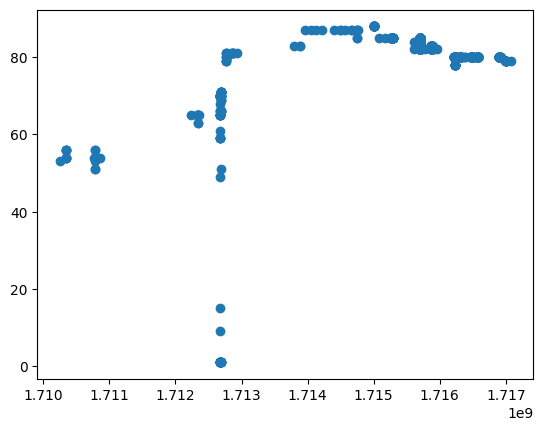

In [30]:
import matplotlib.pyplot as plt 
plt.scatter(df.ts, df.yes_bid_price)
plt.show()